<a href="https://colab.research.google.com/github/fredrickogero/fredrickogero/blob/main/pracice14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
fredrick = pd.read_csv('diabetes.csv')
print(fredrick.shape)
fredrick.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=fredrick)

https://docs.google.com/spreadsheets/d/1BfDg8LXLBQq-F9n4Y9WMKGOIJ02TOhsqaLCy8a2wXsA#gid=0


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Removed accuracy_score and classification_report, as they are in sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Imported accuracy_score and classification_report from sklearn.metrics
fredrick = pd.read_csv('diabetes.csv') # Changed - to = for variable assignment
x=fredrick.drop('Outcome',axis=1)
y=fredrick['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
geo =DecisionTreeClassifier(criterion='entropy' , random_state=42)
geo=geo.fit(x_train,y_train)

In [8]:
y_pred=geo.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [11]:
accuracy=accuracy_score(y_test,y_pred)
accuracy
print(f"Accuracy: {accuracy}: .2f")
report =classification_report(y_test,y_pred)
print(report)
conf_matrix =confusion_matrix(y_test,y_pred)
print(conf_matrix)

Accuracy: 0.7727272727272727: .2f
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154

[[80 19]
 [16 39]]


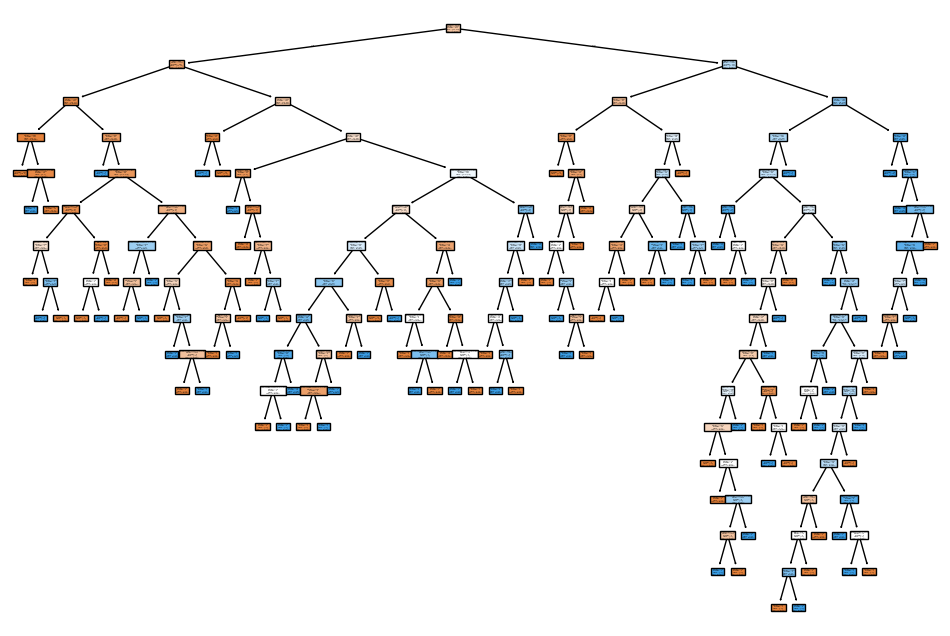

In [16]:
from sklearn.tree import plot_tree # Importing plot_tree from the correct module (sklearn.tree)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(geo,filled=True,feature_names=x.columns ,class_names=['No Diabete',' Diabetes'])
plt.show()

In [17]:
import joblib
geo =DecisionTreeClassifier(criterion='entropy' , random_state=42)
geo=geo.fit(x_train,y_train)
joblib.dump(geo,'diabetes_model.joblib.pkl')

['diabetes_model.joblib.pkl']

In [29]:
import joblib
import pandas as pd
import joblib
import pandas as pd
loaded_model=joblib.load('diabetes_model.joblib.pkl')
new_data = pd.DataFrame({
    'Pregnancies':[2, 4, 6, 9],
    'Glucose':[100, 150, 200, 250],
    'BloodPressure':[70, 80, 90, 100],
    'SkinThickness':[32, 35, 38, 40],
    'Insulin':[100, 150, 200, 250],
    'BMI':[25, 26, 27, 28],
    'DiabetesPedigreeFunction':[0.5, 0.6, 0.7, 0.8],
    'Age':[30, 35, 40, 45]
})

predictions=loaded_model.predict(new_data)
diabeties_mapping = {0: 'No Diabetes', 1: 'Diabetes'}
for i, prediction in enumerate(predictions):
  label =diabeties_mapping[prediction]
  print(f"data {i+1}: Predicted Outcome -{ label}")

#

data 1: Predicted Outcome -No Diabetes
data 2: Predicted Outcome -No Diabetes
data 3: Predicted Outcome -Diabetes
data 4: Predicted Outcome -Diabetes
